# Train/Val/Test 데이터셋 가져오기

In [1]:
import pandas as pd

# 경로 지정
train_path = "./bottleneck_train.csv"
val_path   = "./bottleneck_val.csv"
test_path  = "./bottleneck_test.csv"

# 불러오기
train_df = pd.read_csv(train_path)
val_df   = pd.read_csv(val_path)
test_df  = pd.read_csv(test_path)

# 하나로 합치고 싶으면
df = pd.concat([train_df, val_df, test_df], axis=0).reset_index(drop=True)

print("✅ 불러오기 완료")
print("Train:", train_df.shape, "Val:", val_df.shape, "Test:", test_df.shape)
print("전체 df:", df.shape)

✅ 불러오기 완료
Train: (92867, 76) Val: (19905, 76) Test: (19901, 76)
전체 df: (132673, 76)


In [ ]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (윈도우: 맑은 고딕 / 맥: 애플고딕 / 리눅스: 나눔고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 AppleGothic, NanumGothic
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# logistic_test_predictions_with_proba.csv

In [4]:
import pandas as pd

# ----- CSV 불러오기 -----
df = pd.read_csv("logistic_test_predictions_with_proba.csv")

# 전체 샘플 수
total_samples = len(df)

# 정답/오답 여부 컬럼 추가
df['is_correct'] = df['y_true'] == df['y_pred']

# 전체 요약
total_correct = df['is_correct'].sum()
total_wrong   = (~df['is_correct']).sum()

print("=== 전체 요약 ===")
print(f"정답 개수: {total_correct} ({total_correct/total_samples*100:.2f}%)")
print(f"오답 개수: {total_wrong} ({total_wrong/total_samples*100:.2f}%)")

# 클래스별 요약 (예측 기준)
summary = (
    df.groupby('y_pred')['is_correct']
      .agg(
          Correct_Count = lambda x: (x==True).sum(),
          Wrong_Count   = lambda x: (x==False).sum()
      )
      .reset_index()
)

# 비율 계산 (전체 대비)
summary['Total_Pred'] = summary['Correct_Count'] + summary['Wrong_Count']
summary['Correct_Ratio(%)'] = summary['Correct_Count'] / summary['Total_Pred'] * 100
summary['Wrong_Ratio(%)']   = summary['Wrong_Count'] / summary['Total_Pred'] * 100

print("\n=== 클래스별 요약 (예측 기준) ===")
print(summary)

=== 전체 요약 ===
정답 개수: 19829 (99.64%)
오답 개수: 72 (0.36%)

=== 클래스별 요약 (예측 기준) ===
                    y_pred  Correct_Count  Wrong_Count  Total_Pred  \
0              Cell1_Queue          11539           18       11557   
1              Cell3_Queue            204           12         216   
2              Cell4_Queue              5            2           7   
3  Forklift_Blanking_Queue           8078           38        8116   
4     Forklift_Press_Queue              2            2           4   
5             Press4_Queue              1            0           1   

   Correct_Ratio(%)  Wrong_Ratio(%)  
0         99.844250        0.155750  
1         94.444444        5.555556  
2         71.428571       28.571429  
3         99.531789        0.468211  
4         50.000000       50.000000  
5        100.000000        0.000000  


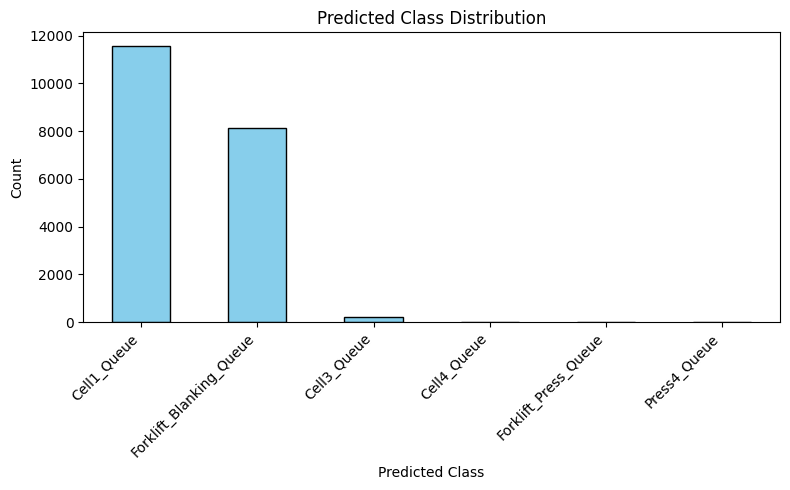

C:\Users\KDT6\AppData\Local\Temp\ipykernel_27980\605965284.py:20: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  class_accuracy = df.groupby('y_pred').apply(lambda x: (x['y_true'] == x['y_pred']).mean())


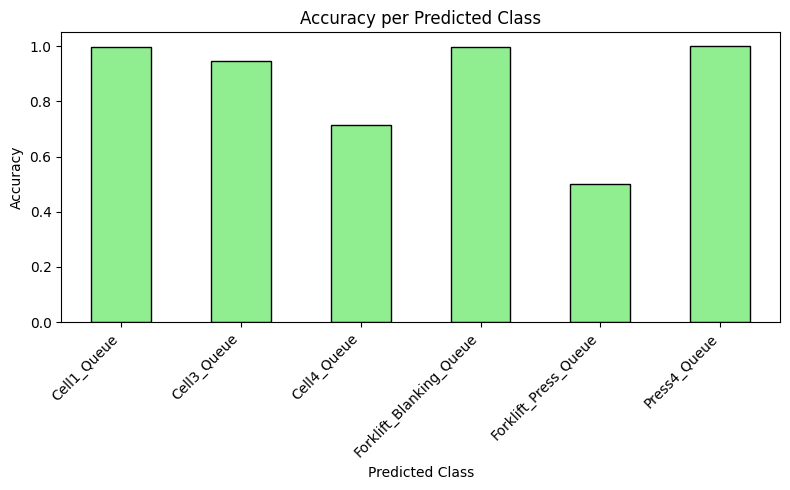

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# ----- CSV 불러오기 -----
df = pd.read_csv("logistic_test_predictions_with_proba.csv")

# ----- 1) 예측 클래스 분포 -----
pred_counts = df['y_pred'].value_counts()

plt.figure(figsize=(8, 5))
pred_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Predicted Class Distribution")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ----- 2) 클래스별 정확도 -----
class_accuracy = df.groupby('y_pred').apply(lambda x: (x['y_true'] == x['y_pred']).mean())

plt.figure(figsize=(8, 5))
class_accuracy.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Accuracy per Predicted Class")
plt.xlabel("Predicted Class")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

C:\Users\KDT6\AppData\Local\Temp\ipykernel_27980\3782518049.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  class_accuracy = df.groupby('y_pred').apply(lambda x: (x['y_true'] == x['y_pred']).mean())


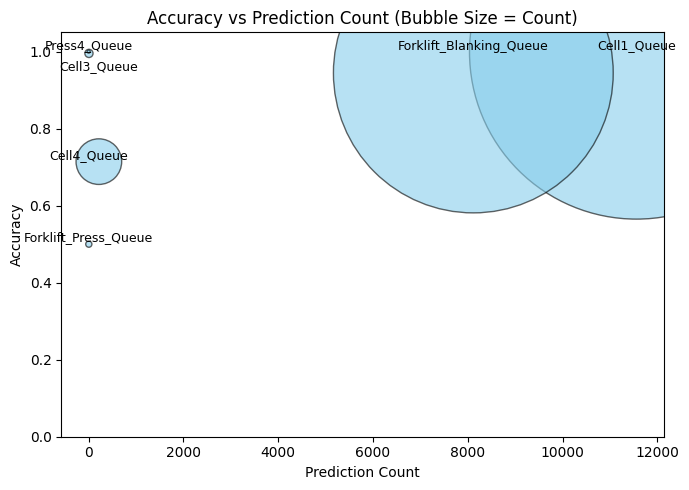

In [8]:
pred_counts = df['y_pred'].value_counts()
class_accuracy = df.groupby('y_pred').apply(lambda x: (x['y_true'] == x['y_pred']).mean())

plt.figure(figsize=(7,5))
plt.scatter(pred_counts, class_accuracy, s=pred_counts*5, alpha=0.6, c='skyblue', edgecolors='k')
for cls in pred_counts.index:
    plt.text(pred_counts[cls], class_accuracy[cls], cls, fontsize=9, ha='center', va='bottom')
plt.xlabel("Prediction Count")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Prediction Count (Bubble Size = Count)")
plt.ylim(0,1.05)
plt.tight_layout()
plt.show()

C:\Users\KDT6\AppData\Local\Temp\ipykernel_27980\3012271382.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  class_accuracy = df.groupby('y_pred').apply(lambda x: (x['y_true'] == x['y_pred']).mean())


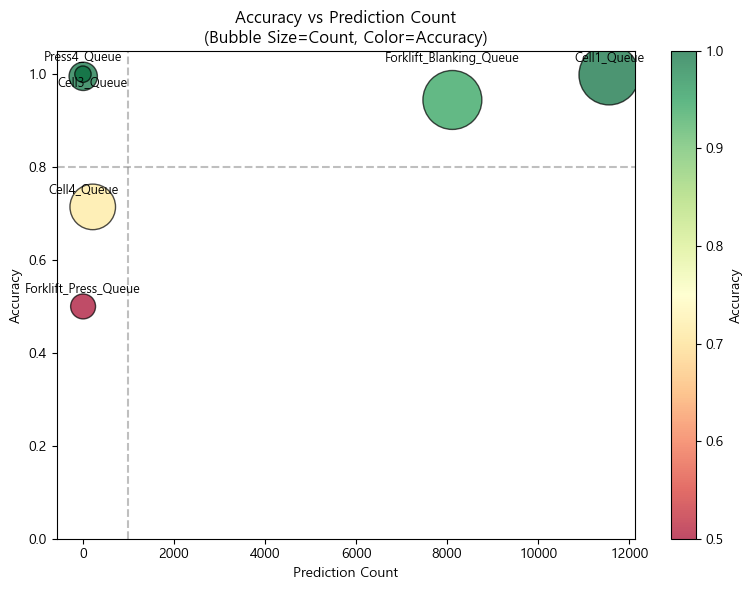

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ----- 데이터 준비 -----
pred_counts = df['y_pred'].value_counts()
class_accuracy = df.groupby('y_pred').apply(lambda x: (x['y_true'] == x['y_pred']).mean())

# ----- 개선된 Bubble Chart -----
plt.figure(figsize=(8,6))
scatter = plt.scatter(pred_counts, class_accuracy,
                      s=np.log1p(pred_counts)*200,     # 로그 스케일
                      c=class_accuracy, cmap="RdYlGn", # 색상 = 정확도
                      alpha=0.7, edgecolors="k")

# 라벨 표시
for cls in pred_counts.index:
    plt.text(pred_counts[cls], class_accuracy[cls]+0.03, cls,
             fontsize=9, ha="center")

# 기준선
plt.axhline(0.8, color="gray", linestyle="--", alpha=0.5)
plt.axvline(1000, color="gray", linestyle="--", alpha=0.5)

# 축/제목
plt.xlabel("Prediction Count")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Prediction Count\n(Bubble Size=Count, Color=Accuracy)")
plt.ylim(0, 1.05)
plt.colorbar(scatter, label="Accuracy")
plt.tight_layout()
plt.show()

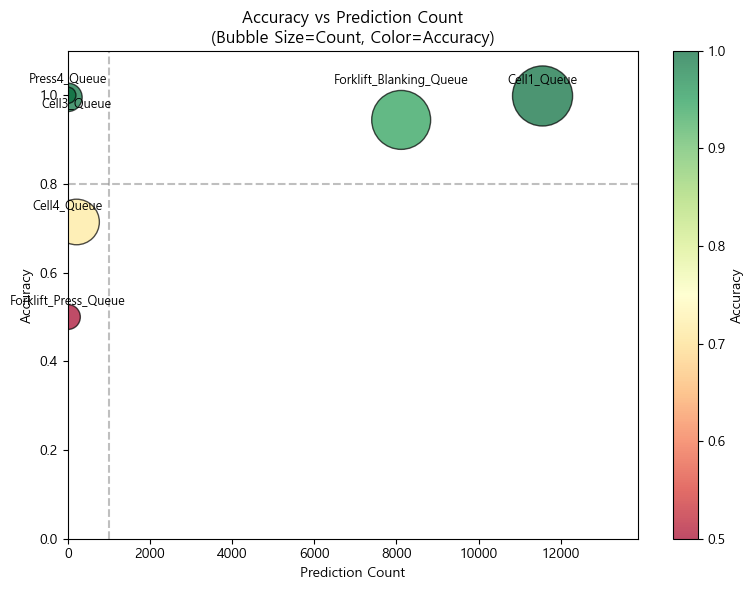

In [42]:
fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter(pred_counts, class_accuracy,
                     s=np.log1p(pred_counts)*200,
                     c=class_accuracy, cmap="RdYlGn",
                     alpha=0.7, edgecolors="k")

for cls in pred_counts.index:
    ax.text(pred_counts[cls], class_accuracy[cls]+0.03, cls,
            fontsize=9, ha="center")

# 기준선
ax.axhline(0.8, color="gray", linestyle="--", alpha=0.5)
ax.axvline(1000, color="gray", linestyle="--", alpha=0.5)

# 여백 조정 → 버블 잘림 방지
ax.set_xlim(0, pred_counts.max()*1.2)  # x축 끝 여유
ax.set_ylim(0, 1.1)                    # y축 여유
plt.margins(x=0.1, y=0.1)

# 축/제목
ax.set_xlabel("Prediction Count")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Prediction Count\n(Bubble Size=Count, Color=Accuracy)")

plt.colorbar(scatter, label="Accuracy")
plt.tight_layout()
plt.show()

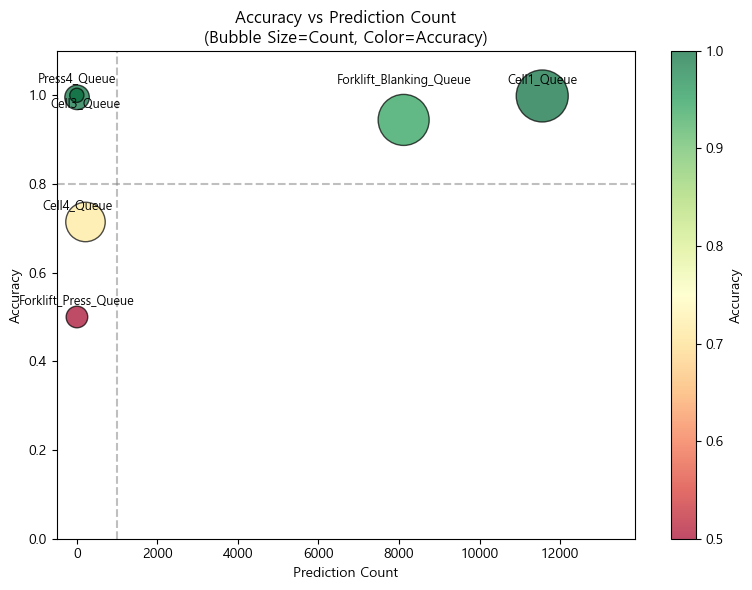

In [43]:
fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter(pred_counts, class_accuracy,
                     s=np.log1p(pred_counts)*150,   # 크기 조금 줄임
                     c=class_accuracy, cmap="RdYlGn",
                     alpha=0.7, edgecolors="k")

# 라벨
for cls in pred_counts.index:
    ax.text(pred_counts[cls], class_accuracy[cls]+0.03, cls,
            fontsize=9, ha="center")

# 기준선
ax.axhline(0.8, color="gray", linestyle="--", alpha=0.5)
ax.axvline(1000, color="gray", linestyle="--", alpha=0.5)

# 여백 조정 → 왼쪽 잘림 방지
ax.set_xlim(-500, pred_counts.max()*1.2)  # 0보다 살짝 왼쪽까지
ax.set_ylim(0, 1.1)

# 축/제목
ax.set_xlabel("Prediction Count")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Prediction Count\n(Bubble Size=Count, Color=Accuracy)")

plt.colorbar(scatter, label="Accuracy")
plt.tight_layout()
plt.show()

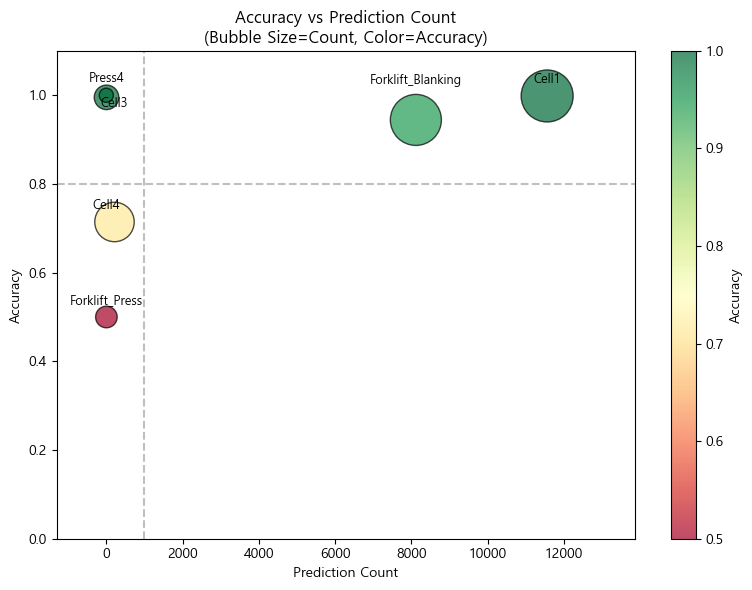

In [50]:
fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter(pred_counts, class_accuracy,
                     s=np.log1p(pred_counts)*150,
                     c=class_accuracy, cmap="RdYlGn",
                     alpha=0.7, edgecolors="k")

# 라벨 표시 (_Queue 제거)
for cls in pred_counts.index:
    label = cls.replace("_Queue", "")
    ax.text(pred_counts[cls], class_accuracy[cls]+0.03, label,
            fontsize=9, ha="center")

# 기준선
ax.axhline(0.8, color="gray", linestyle="--", alpha=0.5)
ax.axvline(1000, color="gray", linestyle="--", alpha=0.5)

# 여백 조정 (왼쪽 더 열기)
ax.set_xlim(-1300, pred_counts.max()*1.2)
ax.set_ylim(0, 1.1)

ax.set_xlabel("Prediction Count")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Prediction Count\n(Bubble Size=Count, Color=Accuracy)")

plt.colorbar(scatter, label="Accuracy")
plt.tight_layout()
plt.show()

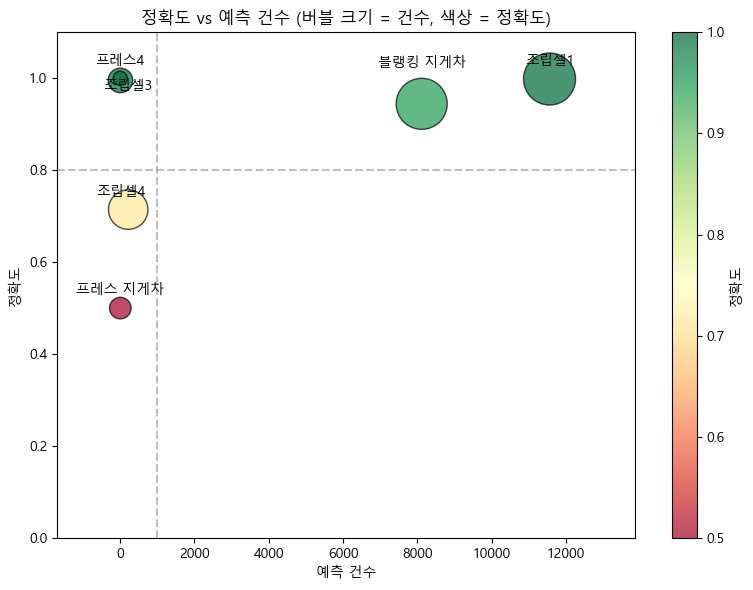

In [54]:
# 클래스명 → 한글 라벨 매핑
label_map = {
    "Cell1_Queue": "조립셀1",
    "Cell3_Queue": "조립셀3",
    "Cell4_Queue": "조립셀4",
    "Press4_Queue": "프레스4",
    "Forklift_Blanking_Queue": "블랭킹 지게차",
    "Forklift_Press_Queue": "프레스 지게차"
}

fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter(pred_counts, class_accuracy,
                     s=np.log1p(pred_counts)*150,
                     c=class_accuracy, cmap="RdYlGn",
                     alpha=0.7, edgecolors="k")

# 라벨 표시 (한글로 변환)
for cls in pred_counts.index:
    label = label_map.get(cls, cls)  # 매핑 없으면 원래 이름 그대로
    ax.text(pred_counts[cls], class_accuracy[cls]+0.03, label,
            fontsize=10, ha="center")

# 기준선
ax.axhline(0.8, color="gray", linestyle="--", alpha=0.5)
ax.axvline(1000, color="gray", linestyle="--", alpha=0.5)

# 여백 조정
ax.set_xlim(-1700, pred_counts.max()*1.2)
ax.set_ylim(0, 1.1)

# 축/제목 한국어로
ax.set_xlabel("예측 건수")
ax.set_ylabel("정확도")
ax.set_title("정확도 vs 예측 건수 (버블 크기 = 건수, 색상 = 정확도)")

# 컬러바 한국어
plt.colorbar(scatter, label="정확도")
plt.tight_layout()
plt.show()

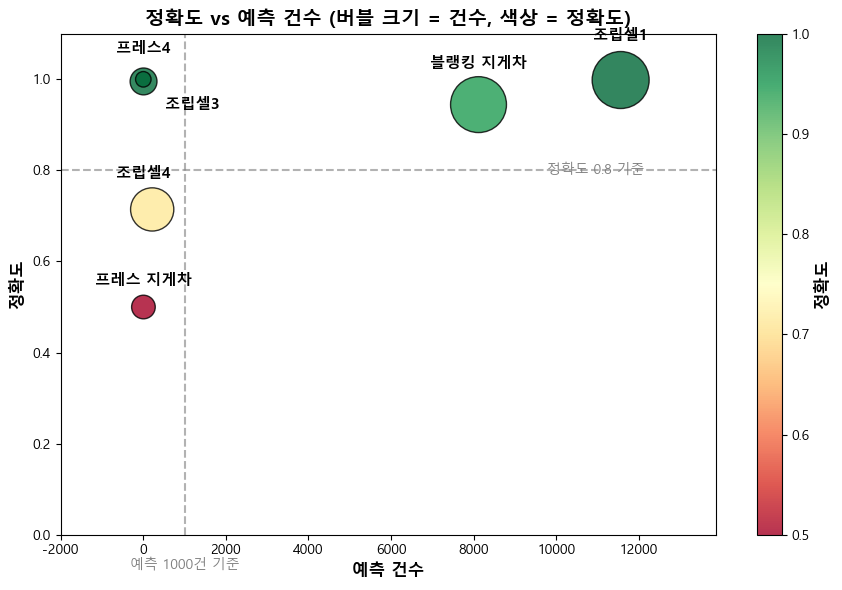

In [59]:
import matplotlib.pyplot as plt
import matplotlib

# 한글 폰트 설정 (윈도우: 맑은 고딕, 맥: AppleGothic)
plt.rcParams['font.family'] = 'Malgun Gothic'

fig, ax = plt.subplots(figsize=(9,6))
scatter = ax.scatter(pred_counts, class_accuracy,
                     s=np.log1p(pred_counts)*180,
                     c=class_accuracy, cmap="RdYlGn",
                     alpha=0.8, edgecolors="k")

# 라벨 표시 (클래스별 조건부 위치 조정)
for cls in pred_counts.index:
    label = label_map.get(cls, cls)
    x = pred_counts[cls]
    y = class_accuracy[cls]

    if label == "조립셀3":
        # 프레스4랑 거의 겹치므로 오른쪽에 표시
        ax.text(x+300, y, label, fontsize=11, fontweight="bold", 
                ha="left", va="center")
    elif label == "프레스4":
        # 위쪽으로 살짝
        ax.text(x, y+0.05, label, fontsize=11, fontweight="bold", 
                ha="center", va="bottom")
    elif label == "조립셀1":
        # 버블 경계와 겹쳐서 조금 더 위로
        ax.text(x, y+0.08, label, fontsize=11, fontweight="bold", 
                ha="center", va="bottom")
    elif label == "블랭킹 지게차":
        # 버블과 너무 떨어져 있으므로 더 가까이
        ax.text(x, y+0.02, label, fontsize=11, fontweight="bold", 
                ha="center", va="bottom")
    elif label == "조립셀4":
        # 살짝 더 떨어뜨림
        ax.text(x, y+0.06, label, fontsize=11, fontweight="bold", 
                ha="center", va="bottom")
    else:
        # 기본 라벨 위치
        ax.text(x, y+0.04, label, fontsize=11, fontweight="bold", 
                ha="center", va="bottom")

# 기준선 + 설명 텍스트
ax.axhline(0.8, color="gray", linestyle="--", alpha=0.6)
ax.text(pred_counts.max()*1.05, 0.8, "정확도 0.8 기준", 
        va="center", ha="right", fontsize=10, color="gray")

ax.axvline(1000, color="gray", linestyle="--", alpha=0.6)
ax.text(1000, -0.05, "예측 1000건 기준", 
        va="top", ha="center", fontsize=10, color="gray")

# 여백 조정
ax.set_xlim(-2000, pred_counts.max()*1.2)
ax.set_ylim(0, 1.1)

# 축/제목
ax.set_xlabel("예측 건수", fontsize=12, fontweight="bold")
ax.set_ylabel("정확도", fontsize=12, fontweight="bold")
ax.set_title("정확도 vs 예측 건수 (버블 크기 = 건수, 색상 = 정확도)", 
             fontsize=14, fontweight="bold")

# 컬러바
cbar = plt.colorbar(scatter)
cbar.set_label("정확도", fontsize=12, fontweight="bold")
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

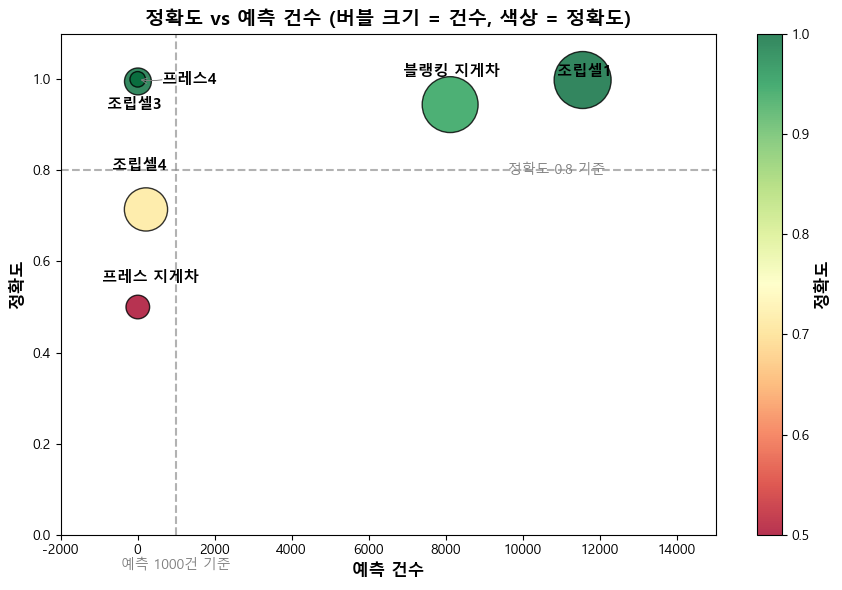

In [83]:
import matplotlib.pyplot as plt
import matplotlib
from adjustText import adjust_text

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

fig, ax = plt.subplots(figsize=(9,6))
scatter = ax.scatter(pred_counts, class_accuracy,
                     s=np.log1p(pred_counts)*180,
                     c=class_accuracy, cmap="RdYlGn",
                     alpha=0.8, edgecolors="k")

texts = []
for cls in pred_counts.index:
    label = label_map.get(cls, cls)
    x = pred_counts[cls]
    y = class_accuracy[cls]

    if label == "조립셀3":
        # 버블 왼쪽에 레이블
        t = ax.text(x-1800, y, label, fontsize=11, fontweight="bold",
                    ha="right", va="center")
        # ax.annotate("", xy=(x, y), xytext=(x-1800, y),
        #             arrowprops=dict(arrowstyle="->", color="gray", lw=0.7,
        #                             connectionstyle="arc3,rad=0.1"))
    
    elif label == "프레스4":
        # 버블 오른쪽에 레이블
        t = ax.text(x+800, y, label, fontsize=11, fontweight="bold",
                    ha="left", va="center")
        ax.annotate("", xy=(x, y), xytext=(x+700, y),
                    arrowprops=dict(arrowstyle="->", color="gray", lw=0.7,
                                    connectionstyle="arc3,rad=-0.1"))
    elif label == "조립셀1":
        # 버블 위 바깥에 라벨 표시
        t = ax.text(x, y+0.25, label, fontsize=11, fontweight="bold",
                    ha="center", va="bottom")
    elif label == "블랭킹 지게차":
        t = ax.text(x, y+0.06, label, fontsize=11, fontweight="bold",
                    ha="center", va="bottom")
    elif label == "조립셀4":
        t = ax.text(x, y+0.08, label, fontsize=11, fontweight="bold",
                    ha="center", va="bottom")
    else:
        t = ax.text(x, y+0.05, label, fontsize=11, fontweight="bold",
                    ha="center", va="bottom")

    texts.append(t)

# adjustText는 다른 라벨만 보정
adjust_text(texts, ax=ax)

# 기준선 + 설명
ax.axhline(0.8, color="gray", linestyle="--", alpha=0.6)
ax.text(pred_counts.max()*1.05, 0.8, "정확도 0.8 기준", 
        va="center", ha="right", fontsize=10, color="gray")

ax.axvline(1000, color="gray", linestyle="--", alpha=0.6)
ax.text(1000, -0.05, "예측 1000건 기준", 
        va="top", ha="center", fontsize=10, color="gray")

# 여백
ax.set_xlim(-2000, pred_counts.max()*1.3)
ax.set_ylim(0, 1.1)

# 축/제목
ax.set_xlabel("예측 건수", fontsize=12, fontweight="bold")
ax.set_ylabel("정확도", fontsize=12, fontweight="bold")
ax.set_title("정확도 vs 예측 건수 (버블 크기 = 건수, 색상 = 정확도)", 
             fontsize=14, fontweight="bold")

# 컬러바
cbar = plt.colorbar(scatter)
cbar.set_label("정확도", fontsize=12, fontweight="bold")
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

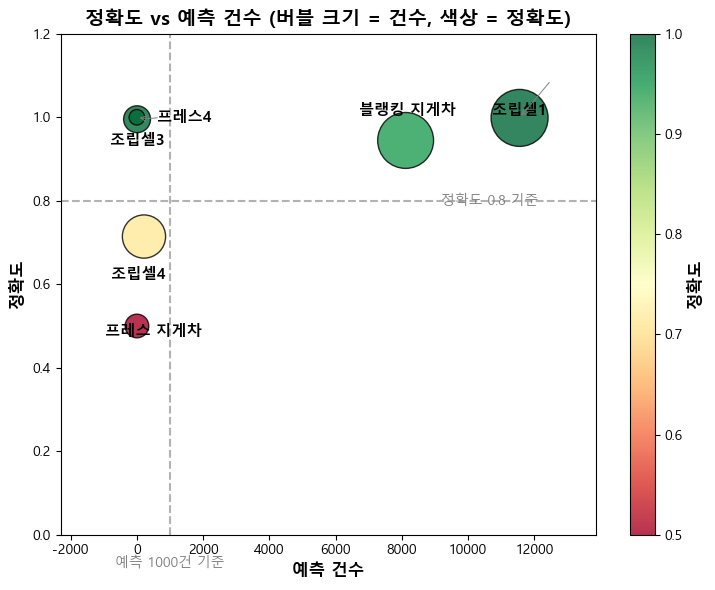

In [92]:
import matplotlib.pyplot as plt
import matplotlib
from adjustText import adjust_text

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

fig, ax = plt.subplots(figsize=(7.5,6))
scatter = ax.scatter(pred_counts, class_accuracy,
                     s=np.log1p(pred_counts)*180,
                     c=class_accuracy, cmap="RdYlGn",
                     alpha=0.8, edgecolors="k")

texts = []
for cls in pred_counts.index:
    label = label_map.get(cls, cls)
    x = pred_counts[cls]
    y = class_accuracy[cls]

    if label == "조립셀3":
        # 버블 왼쪽
        t = ax.text(x-1800, y, label, fontsize=11, fontweight="bold",
                    ha="right", va="center")
    
    elif label == "프레스4":
        # 버블 오른쪽
        t = ax.text(x+800, y, label, fontsize=11, fontweight="bold",
                    ha="left", va="center")
        ax.annotate("", xy=(x, y), xytext=(x+700, y),
                    arrowprops=dict(arrowstyle="->", color="gray", lw=0.7,
                                    connectionstyle="arc3,rad=-0.1"))
    
    elif label == "조립셀1":
        # 버블 우측 위
        t = ax.text(x+1000, y+0.1, label, fontsize=11, fontweight="bold",
                    ha="left", va="bottom")
        
    elif label == "블랭킹 지게차":
        # 살짝 위
        t = ax.text(x, y+0.1, label, fontsize=11, fontweight="bold",
                    ha="center", va="bottom")
    
    elif label == "조립셀4":
        # 버블보다 조금 더 아래
        t = ax.text(x, y-0.08, label, fontsize=11, fontweight="bold",
                    ha="center", va="top")
    
    elif label == "프레스 지게차":
        # 버블보다 조금 더 아래
        t = ax.text(x, y-0.08, label, fontsize=11, fontweight="bold",
                    ha="center", va="top")
    
    else:
        # 기본
        t = ax.text(x, y+0.05, label, fontsize=11, fontweight="bold",
                    ha="center", va="bottom")

    texts.append(t)

# adjustText는 다른 라벨만 보정
adjust_text(texts, ax=ax)

# 기준선 + 설명
ax.axhline(0.8, color="gray", linestyle="--", alpha=0.6)
ax.text(pred_counts.max()*1.05, 0.8, "정확도 0.8 기준", 
        va="center", ha="right", fontsize=10, color="gray")

ax.axvline(1000, color="gray", linestyle="--", alpha=0.6)
ax.text(1000, -0.05, "예측 1000건 기준", 
        va="top", ha="center", fontsize=10, color="gray")

# 여백
ax.set_xlim(-2300, pred_counts.max()*1.2)
ax.set_ylim(0, 1.2)

# 축/제목
ax.set_xlabel("예측 건수", fontsize=12, fontweight="bold")
ax.set_ylabel("정확도", fontsize=12, fontweight="bold")
ax.set_title("정확도 vs 예측 건수 (버블 크기 = 건수, 색상 = 정확도)", 
             fontsize=14, fontweight="bold")

# 컬러바
cbar = plt.colorbar(scatter)
cbar.set_label("정확도", fontsize=12, fontweight="bold")
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

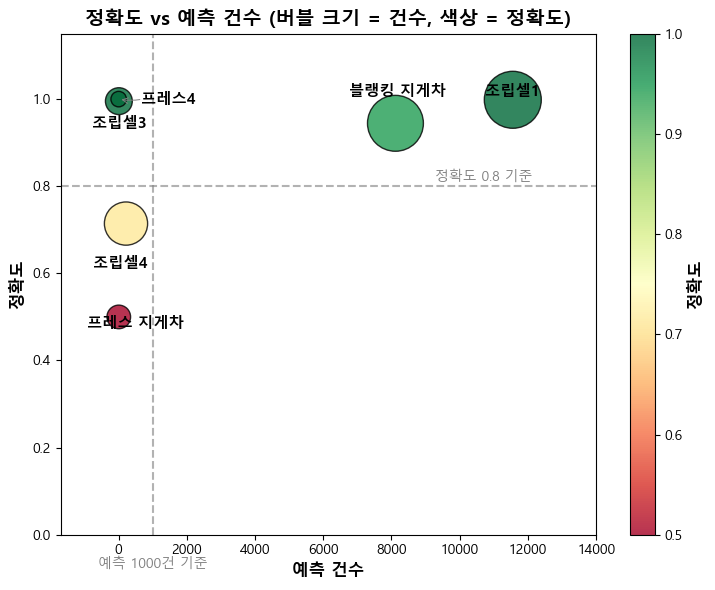

In [107]:
import matplotlib.pyplot as plt
import matplotlib
from adjustText import adjust_text
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

fig, ax = plt.subplots(figsize=(7.5,6))
scatter = ax.scatter(pred_counts, class_accuracy,
                     s=np.log1p(pred_counts)*180,
                     c=class_accuracy, cmap="RdYlGn",
                     alpha=0.8, edgecolors="k")

texts = []
for cls in pred_counts.index:
    label = label_map.get(cls, cls)
    x = pred_counts[cls]
    y = class_accuracy[cls]

    if label == "조립셀3":
        # 버블 왼쪽
        t = ax.text(x-1800, y, label, fontsize=11, fontweight="bold",
                    ha="right", va="center")
    
    elif label == "프레스4":
        # 버블 오른쪽
        t = ax.text(x+800, y, label, fontsize=11, fontweight="bold",
                    ha="left", va="center")
        ax.annotate("", xy=(x, y), xytext=(x+700, y),
                    arrowprops=dict(arrowstyle="->", color="gray", lw=0.7,
                                    connectionstyle="arc3,rad=-0.1"))
    
    elif label == "조립셀1":
        # 버블 우측 위
        t = ax.text(x+1000, y+0.1, label, fontsize=11, fontweight="bold",
                    ha="left", va="bottom")
        
    elif label == "블랭킹 지게차":
        # 살짝 위
        t = ax.text(x, y+0.1, label, fontsize=11, fontweight="bold",
                    ha="center", va="bottom")
    
    elif label == "조립셀4":
        # 버블보다 조금 더 아래
        t = ax.text(x, y-0.08, label, fontsize=11, fontweight="bold",
                    ha="center", va="top")
    
    elif label == "프레스 지게차":
        # 버블보다 조금 더 아래
        t = ax.text(x, y-0.08, label, fontsize=11, fontweight="bold",
                    ha="center", va="top")
    
    else:
        # 기본
        t = ax.text(x, y+0.05, label, fontsize=11, fontweight="bold",
                    ha="center", va="bottom")

    texts.append(t)

# adjustText는 다른 라벨만 보정
adjust_text(texts, ax=ax)

# 기준선 + 설명
ax.axhline(0.8, color="gray", linestyle="--", alpha=0.6)
ax.text(pred_counts.max()*1.05, 0.82, "정확도 0.8 기준",   # 👈 y값 0.8 → 0.82
        va="center", ha="right", fontsize=10, color="gray")

ax.axvline(1000, color="gray", linestyle="--", alpha=0.6)
ax.text(1000, -0.05, "예측 1000건 기준", 
        va="top", ha="center", fontsize=10, color="gray")

# 여백
ax.set_xlim(-1700, pred_counts.max()*1.04)
ax.set_ylim(0, 1.15)

# ✅ x축 -2000, y축 1.2 라벨 숨기기
xticks = ax.get_xticks()
ax.set_xticks([tick for tick in xticks if tick >= 0])
yticks = ax.get_yticks()
ax.set_yticks([tick for tick in yticks if tick <= 1.0])

# 축/제목
ax.set_xlabel("예측 건수", fontsize=12, fontweight="bold")
ax.set_ylabel("정확도", fontsize=12, fontweight="bold")
ax.set_title("정확도 vs 예측 건수 (버블 크기 = 건수, 색상 = 정확도)", 
             fontsize=14, fontweight="bold")

# 컬러바
cbar = plt.colorbar(scatter)
cbar.set_label("정확도", fontsize=12, fontweight="bold")
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

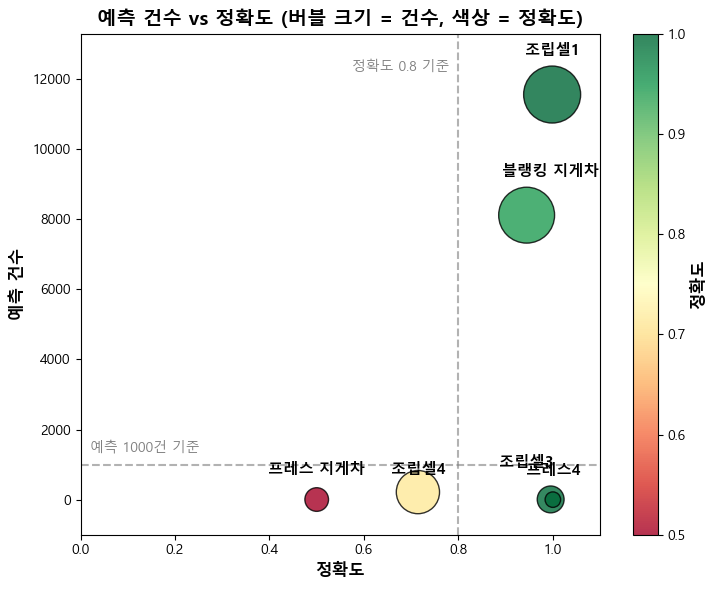

In [132]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

fig, ax = plt.subplots(figsize=(7.5,6))
scatter = ax.scatter(class_accuracy, pred_counts,
                     s=np.log1p(pred_counts)*180,
                     c=class_accuracy, cmap="RdYlGn",
                     alpha=0.8, edgecolors="k")

# 모든 버블의 라벨은 위쪽에 표시
for cls in pred_counts.index:
    label = label_map.get(cls, cls)
    x = class_accuracy[cls]   # 정확도
    y = pred_counts[cls]      # 예측 건수

    # 버블 크기에 따라 오프셋 다르게 (큰 버블은 조금 더 띄움)
    offset = 1000 if pred_counts[cls] > 3000 else 600

    ax.text(x, y+offset, label,
            fontsize=11, fontweight="bold",
            ha="center", va="bottom")

# 기준선 + 설명
ax.axvline(0.8, color="gray", linestyle="--", alpha=0.6)
ax.text(0.78, pred_counts.max()*1.05, "정확도 0.8 기준",
        va="bottom", ha="right", fontsize=10, color="gray")

ax.axhline(1000, color="gray", linestyle="--", alpha=0.6)
ax.text(0.02, 1000+300, "예측 1000건 기준",
        va="bottom", ha="left", fontsize=10, color="gray")

# ✅ 여백 조정 → 버블 및 레이블 안 잘리게
ax.set_xlim(0, 1.1)
ax.set_ylim(-1000, pred_counts.max()*1.15)

# 축/제목
ax.set_xlabel("정확도", fontsize=12, fontweight="bold")
ax.set_ylabel("예측 건수", fontsize=12, fontweight="bold")
ax.set_title("예측 건수 vs 정확도 (버블 크기 = 건수, 색상 = 정확도)",
             fontsize=14, fontweight="bold")

# 컬러바
cbar = plt.colorbar(scatter)
cbar.set_label("정확도", fontsize=12, fontweight="bold")
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

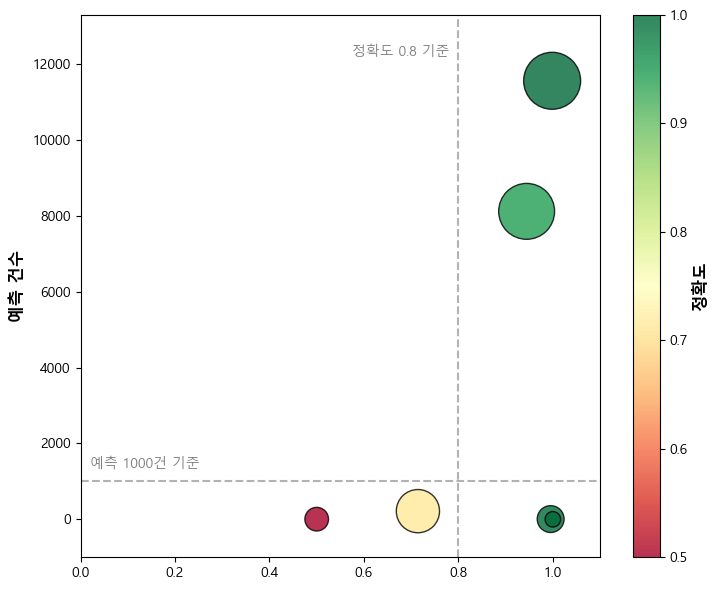

In [133]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

fig, ax = plt.subplots(figsize=(7.5,6))
scatter = ax.scatter(class_accuracy, pred_counts,
                     s=np.log1p(pred_counts)*180,
                     c=class_accuracy, cmap="RdYlGn",
                     alpha=0.8, edgecolors="k")

# 모든 버블의 라벨은 위쪽에 표시
for cls in pred_counts.index:
    label = label_map.get(cls, cls)
    x = class_accuracy[cls]   # 정확도
    y = pred_counts[cls]      # 예측 건수

    # 버블 크기에 따라 오프셋 다르게 (큰 버블은 조금 더 띄움)
    offset = 1000 if pred_counts[cls] > 3000 else 600

    # ax.text(x, y+offset, label,
    #         fontsize=11, fontweight="bold",
    #         ha="center", va="bottom")

# 기준선 + 설명
ax.axvline(0.8, color="gray", linestyle="--", alpha=0.6)
ax.text(0.78, pred_counts.max()*1.05, "정확도 0.8 기준",
        va="bottom", ha="right", fontsize=10, color="gray")

ax.axhline(1000, color="gray", linestyle="--", alpha=0.6)
ax.text(0.02, 1000+300, "예측 1000건 기준",
        va="bottom", ha="left", fontsize=10, color="gray")

# ✅ 여백 조정 → 버블 및 레이블 안 잘리게
ax.set_xlim(0, 1.1)
ax.set_ylim(-1000, pred_counts.max()*1.15)

# 축/제목
# ax.set_xlabel("정확도", fontsize=12, fontweight="bold")
ax.set_ylabel("예측 건수", fontsize=12, fontweight="bold")
# ax.set_title("예측 건수 vs 정확도 (버블 크기 = 건수, 색상 = 정확도)",
#              fontsize=14, fontweight="bold")

# 컬러바
cbar = plt.colorbar(scatter)
cbar.set_label("정확도", fontsize=12, fontweight="bold")
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

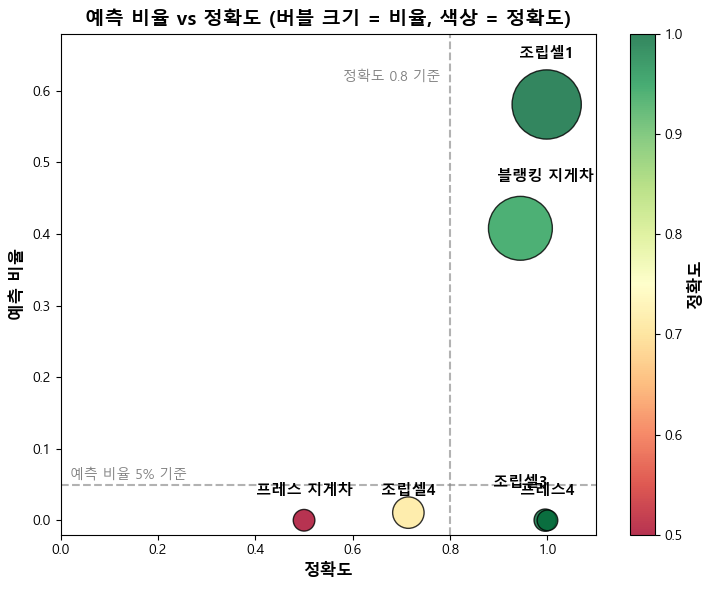

In [149]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# ✅ 비율 계산
pred_ratio = pred_counts / pred_counts.sum()

fig, ax = plt.subplots(figsize=(7.5,6))

# ✅ 버블 크기: 비율 + 최소 크기 보정
bubble_size = (np.sqrt(pred_ratio) * 3000) + 200

scatter = ax.scatter(class_accuracy, pred_ratio,
                     s=bubble_size,
                     c=class_accuracy, cmap="RdYlGn",
                     alpha=0.8, edgecolors="k")

# 모든 버블 라벨은 위쪽에 표시
for cls in pred_counts.index:
    label = label_map.get(cls, cls)
    x = class_accuracy[cls]   # 정확도
    y = pred_ratio[cls]       # 예측 비율

    # 버블 크기에 따라 오프셋 다르게 (큰 버블은 조금 더 띄움)
    offset = 0.06 if pred_ratio[cls] > 0.1 else 0.03

    ax.text(x, y+offset, label,
            fontsize=11, fontweight="bold",
            ha="center", va="bottom")

# 기준선 + 설명
ax.axvline(0.8, color="gray", linestyle="--", alpha=0.6)
ax.text(0.78, pred_ratio.max()*1.05, "정확도 0.8 기준",
        va="bottom", ha="right", fontsize=10, color="gray")

ax.axhline(0.05, color="gray", linestyle="--", alpha=0.6)  # 예: 5% 기준선
ax.text(0.02, 0.055, "예측 비율 5% 기준",
        va="bottom", ha="left", fontsize=10, color="gray")

# ✅ 여백 조정 → 버블 및 라벨 안 잘리게
ax.set_xlim(0, 1.1)
ax.set_ylim(-0.02, pred_ratio.max()*1.17)

# 축/제목
ax.set_xlabel("정확도", fontsize=12, fontweight="bold")
ax.set_ylabel("예측 비율", fontsize=12, fontweight="bold")
ax.set_title("예측 비율 vs 정확도 (버블 크기 = 비율, 색상 = 정확도)",
             fontsize=14, fontweight="bold")

# 컬러바
cbar = plt.colorbar(scatter)
cbar.set_label("정확도", fontsize=12, fontweight="bold")
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

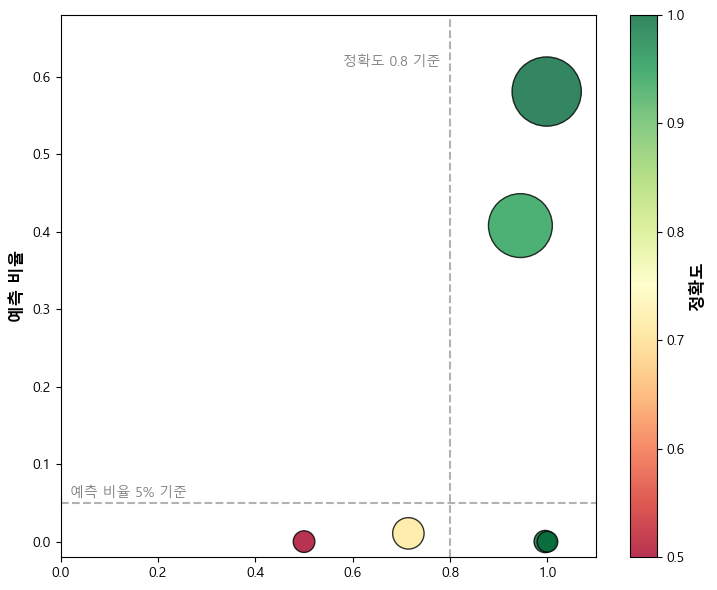

In [150]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# ✅ 비율 계산
pred_ratio = pred_counts / pred_counts.sum()

fig, ax = plt.subplots(figsize=(7.5,6))

# ✅ 버블 크기: 비율 + 최소 크기 보정
bubble_size = (np.sqrt(pred_ratio) * 3000) + 200

scatter = ax.scatter(class_accuracy, pred_ratio,
                     s=bubble_size,
                     c=class_accuracy, cmap="RdYlGn",
                     alpha=0.8, edgecolors="k")

# 모든 버블 라벨은 위쪽에 표시
for cls in pred_counts.index:
    label = label_map.get(cls, cls)
    x = class_accuracy[cls]   # 정확도
    y = pred_ratio[cls]       # 예측 비율

    # 버블 크기에 따라 오프셋 다르게 (큰 버블은 조금 더 띄움)
    offset = 0.06 if pred_ratio[cls] > 0.1 else 0.03

    # ax.text(x, y+offset, label,
    #         fontsize=11, fontweight="bold",
    #         ha="center", va="bottom")

# 기준선 + 설명
ax.axvline(0.8, color="gray", linestyle="--", alpha=0.6)
ax.text(0.78, pred_ratio.max()*1.05, "정확도 0.8 기준",
        va="bottom", ha="right", fontsize=10, color="gray")

ax.axhline(0.05, color="gray", linestyle="--", alpha=0.6)  # 예: 5% 기준선
ax.text(0.02, 0.055, "예측 비율 5% 기준",
        va="bottom", ha="left", fontsize=10, color="gray")

# ✅ 여백 조정 → 버블 및 라벨 안 잘리게
ax.set_xlim(0, 1.1)
ax.set_ylim(-0.02, pred_ratio.max()*1.17)

# 축/제목
# ax.set_xlabel("정확도", fontsize=12, fontweight="bold")
ax.set_ylabel("예측 비율", fontsize=12, fontweight="bold")
# ax.set_title("예측 비율 vs 정확도 (버블 크기 = 비율, 색상 = 정확도)",
#              fontsize=14, fontweight="bold")

# 컬러바
cbar = plt.colorbar(scatter)
cbar.set_label("정확도", fontsize=12, fontweight="bold")
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

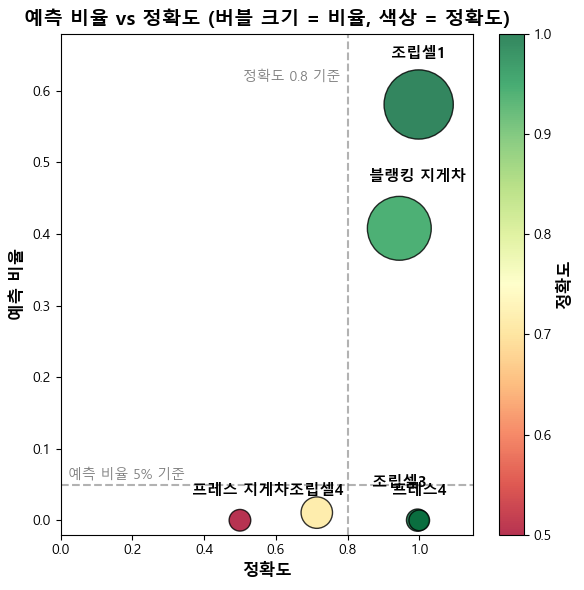

In [153]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# ✅ 비율 계산
pred_ratio = pred_counts / pred_counts.sum()

fig, ax = plt.subplots(figsize=(6,6))

# ✅ 버블 크기: 비율 + 최소 크기 보정
bubble_size = (np.sqrt(pred_ratio) * 3000) + 200

scatter = ax.scatter(class_accuracy, pred_ratio,
                     s=bubble_size,
                     c=class_accuracy, cmap="RdYlGn",
                     alpha=0.8, edgecolors="k")

# 모든 버블 라벨은 위쪽에 표시
for cls in pred_counts.index:
    label = label_map.get(cls, cls)
    x = class_accuracy[cls]   # 정확도
    y = pred_ratio[cls]       # 예측 비율

    # 버블 크기에 따라 오프셋 다르게 (큰 버블은 조금 더 띄움)
    offset = 0.06 if pred_ratio[cls] > 0.1 else 0.03

    ax.text(x, y+offset, label,
            fontsize=11, fontweight="bold",
            ha="center", va="bottom")

# 기준선 + 설명
ax.axvline(0.8, color="gray", linestyle="--", alpha=0.6)
ax.text(0.78, pred_ratio.max()*1.05, "정확도 0.8 기준",
        va="bottom", ha="right", fontsize=10, color="gray")

ax.axhline(0.05, color="gray", linestyle="--", alpha=0.6)  # 예: 5% 기준선
ax.text(0.02, 0.055, "예측 비율 5% 기준",
        va="bottom", ha="left", fontsize=10, color="gray")

# ✅ 여백 조정 → 버블 및 라벨 안 잘리게
ax.set_xlim(0, 1.15)
ax.set_ylim(-0.02, pred_ratio.max()*1.17)

# 축/제목
ax.set_xlabel("정확도", fontsize=12, fontweight="bold")
ax.set_ylabel("예측 비율", fontsize=12, fontweight="bold")
ax.set_title("예측 비율 vs 정확도 (버블 크기 = 비율, 색상 = 정확도)",
             fontsize=14, fontweight="bold")

# 컬러바
cbar = plt.colorbar(scatter)
cbar.set_label("정확도", fontsize=12, fontweight="bold")
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

In [155]:
import pandas as pd

# ✅ 개수 + 비율 합쳐서 표 만들기
summary_df = pd.DataFrame({
    "개수": pred_counts,
    "비율(%)": (pred_ratio * 100).round(2)
})

print("=== 예측 클래스별 개수 및 비율 ===")
print(summary_df)

=== 예측 클래스별 개수 및 비율 ===
                            개수  비율(%)
y_pred                               
Cell1_Queue              11557  58.07
Forklift_Blanking_Queue   8116  40.78
Cell3_Queue                216   1.09
Cell4_Queue                  7   0.04
Forklift_Press_Queue         4   0.02
Press4_Queue                 1   0.01


In [160]:
print("[ 예측 클래스별 분포 ]")
for cls in pred_counts.index:
    cnt = pred_counts[cls]
    ratio = pred_ratio[cls] * 100
    print(f"{cls}\n빈도수: {cnt}\n비율(%): {ratio:.4f}\n")

[ 예측 클래스별 분포 ]
Cell1_Queue
빈도수: 11557
비율(%): 58.0725

Forklift_Blanking_Queue
빈도수: 8116
비율(%): 40.7819

Cell3_Queue
빈도수: 216
비율(%): 1.0854

Cell4_Queue
빈도수: 7
비율(%): 0.0352

Forklift_Press_Queue
빈도수: 4
비율(%): 0.0201

Press4_Queue
빈도수: 1
비율(%): 0.0050



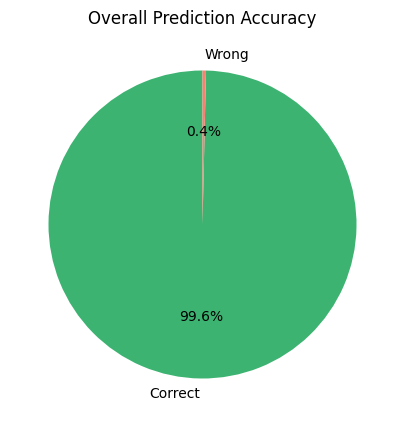

In [9]:
correct_total = (df['y_true'] == df['y_pred']).sum()
wrong_total   = (df['y_true'] != df['y_pred']).sum()

plt.figure(figsize=(5,5))
plt.pie([correct_total, wrong_total],
        labels=['Correct','Wrong'],
        autopct='%1.1f%%',
        colors=['mediumseagreen','salmon'],
        startangle=90)
plt.title("Overall Prediction Accuracy")
plt.show()

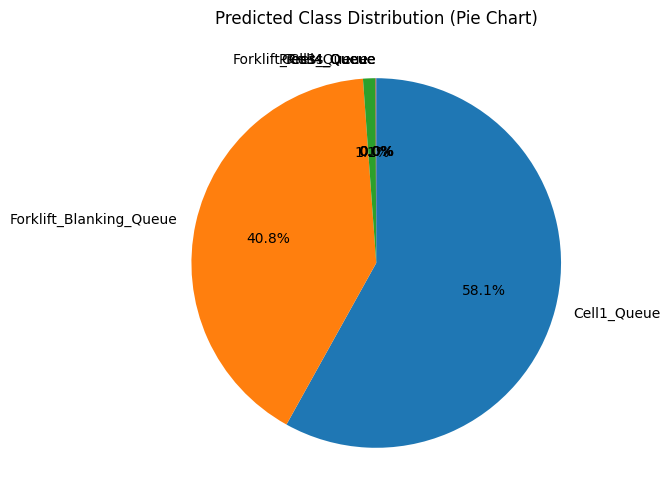

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# ----- CSV 불러오기 -----
df = pd.read_csv("logistic_test_predictions_with_proba.csv")

# ----- 예측 클래스 분포 -----
pred_counts = df['y_pred'].value_counts()

# ----- 파이차트 -----
plt.figure(figsize=(6,6))
plt.pie(
    pred_counts,
    labels=pred_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
plt.title("Predicted Class Distribution (Pie Chart)")
plt.show()

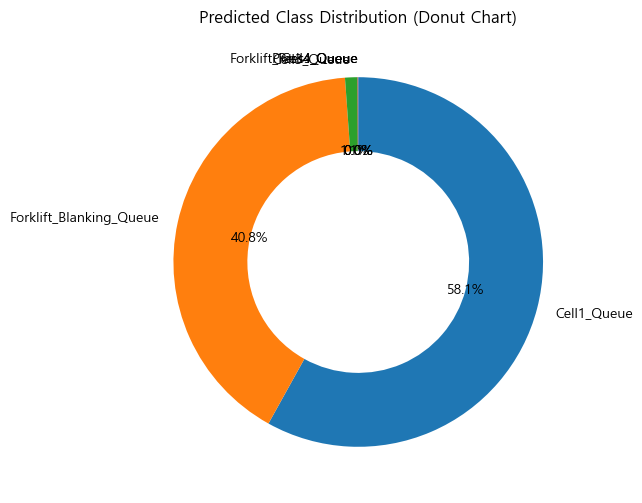

In [29]:
plt.figure(figsize=(6,6))
plt.pie(pred_counts, labels=pred_counts.index, autopct='%1.1f%%',
        startangle=90, counterclock=False, wedgeprops={'width':0.4})
plt.title("Predicted Class Distribution (Donut Chart)")
plt.show()

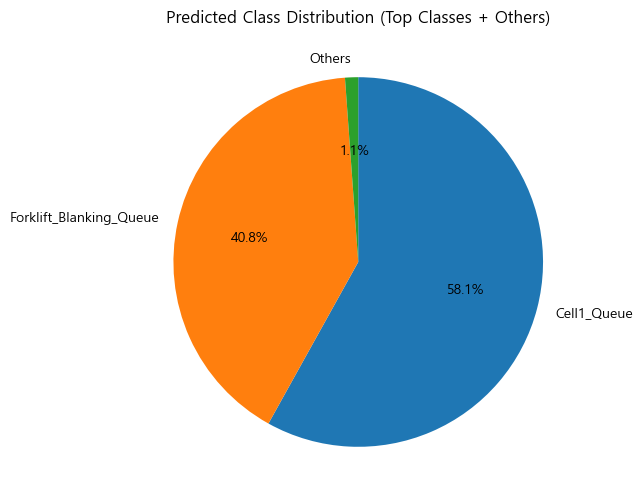

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# ----- CSV 불러오기 -----
df = pd.read_csv("logistic_test_predictions_with_proba.csv")

# ----- 예측 클래스 분포 -----
pred_counts = df['y_pred'].value_counts()

# ----- 상위 N + Others 묶기 -----
top_n = 2  # 상위 2개만 표시
top_counts = pred_counts.nlargest(top_n)
others = pred_counts.iloc[top_n:].sum()

plot_counts = pd.concat([top_counts, pd.Series({'Others': others})])

# ----- 파이차트 -----
plt.figure(figsize=(6,6))
plt.pie(
    plot_counts,
    labels=plot_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
plt.title("Predicted Class Distribution (Top Classes + Others)")
plt.show()

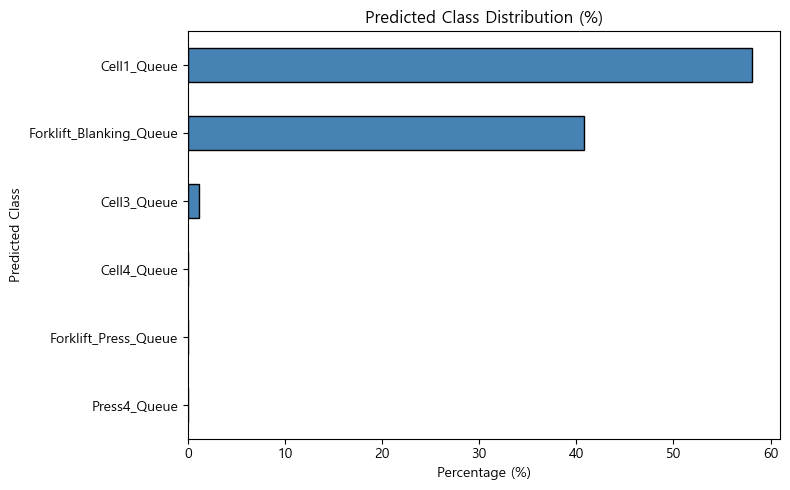

In [32]:
plt.figure(figsize=(8,5))
(pred_counts / pred_counts.sum() * 100).sort_values().plot(
    kind='barh', color='steelblue', edgecolor='black'
)
plt.title("Predicted Class Distribution (%)")
plt.xlabel("Percentage (%)")
plt.ylabel("Predicted Class")
plt.tight_layout()
plt.show()

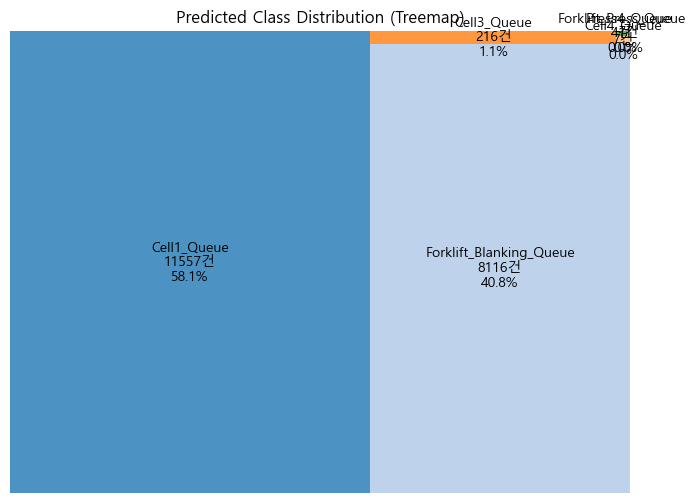

In [33]:
import squarify

sizes = pred_counts.values
labels = [f"{cls}\n{val}건\n{val/pred_counts.sum()*100:.1f}%" 
          for cls, val in zip(pred_counts.index, pred_counts.values)]

plt.figure(figsize=(8,6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=plt.cm.tab20.colors)
plt.axis('off')
plt.title("Predicted Class Distribution (Treemap)")
plt.show()

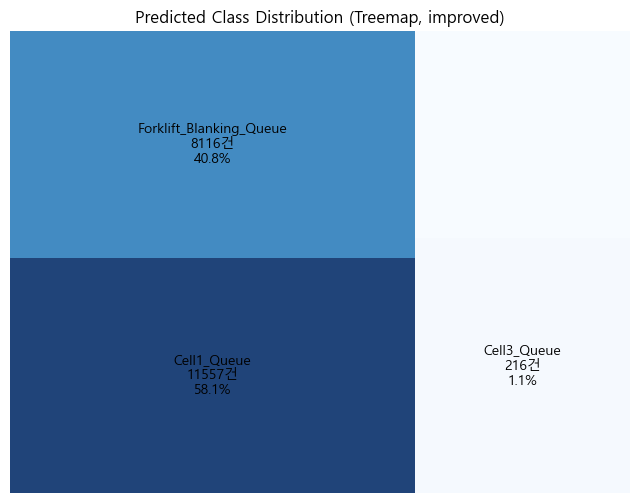

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

df = pd.read_csv("logistic_test_predictions_with_proba.csv")
pred_counts = df['y_pred'].value_counts()

# ----- 크기 로그 스케일 -----
sizes = np.log1p(pred_counts.values)

# ----- 색상 (Count 기반) -----
norm = mcolors.Normalize(vmin=pred_counts.min(), vmax=pred_counts.max())
colors = [cm.Blues(norm(v)) for v in pred_counts.values]

# ----- 라벨 (1% 이상만 표시) -----
labels = [
    f"{cls}\n{val}건\n{val/pred_counts.sum()*100:.1f}%"
    if val/pred_counts.sum()*100 > 1 else ""
    for cls, val in zip(pred_counts.index, pred_counts.values)
]

# ----- Treemap -----
plt.figure(figsize=(8,6))
squarify.plot(sizes=sizes, label=labels, alpha=0.9, color=colors, text_kwargs={'fontsize':10})
plt.axis('off')
plt.title("Predicted Class Distribution (Treemap, improved)")
plt.show()

C:\Users\KDT6\AppData\Local\Temp\ipykernel_27980\1365617909.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = df.groupby('y_pred', group_keys=False).apply(


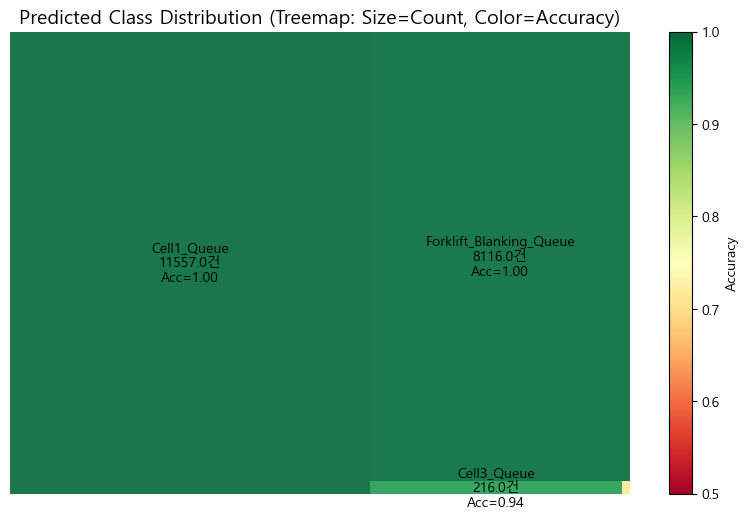

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# CSV 불러오기
df = pd.read_csv("logistic_test_predictions_with_proba.csv")

# Count & Accuracy 요약
summary = df.groupby('y_pred', group_keys=False).apply(
    lambda x: pd.Series({
        "Count": len(x),
        "Accuracy": (x['y_true'] == x['y_pred']).mean()
    })
).reset_index()

# 크기: Count 그대로
sizes = summary['Count'].values

# 색상: Accuracy 기준
norm = mcolors.Normalize(vmin=summary['Accuracy'].min(), vmax=summary['Accuracy'].max())
cmap = cm.RdYlGn
colors = [cmap(norm(v)) for v in summary['Accuracy'].values]

# 라벨: 1% 이상만 표시
total = summary['Count'].sum()
labels = [
    f"{row['y_pred']}\n{row['Count']}건\nAcc={row['Accuracy']:.2f}"
    if (row['Count']/total*100) > 1 else ""
    for _, row in summary.iterrows()
]

# Figure + Axes 명시
fig, ax = plt.subplots(figsize=(10,6))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.9, text_kwargs={'fontsize':10}, ax=ax)
ax.axis('off')
ax.set_title("Predicted Class Distribution (Treemap: Size=Count, Color=Accuracy)", fontsize=14)

# Colorbar 추가 (ax 명시)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Accuracy')

plt.show()

C:\Users\KDT6\AppData\Local\Temp\ipykernel_27980\1313607803.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = df.groupby('y_pred', group_keys=False).apply(
C:\Users\KDT6\AppData\Local\Temp\ipykernel_27980\1313607803.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


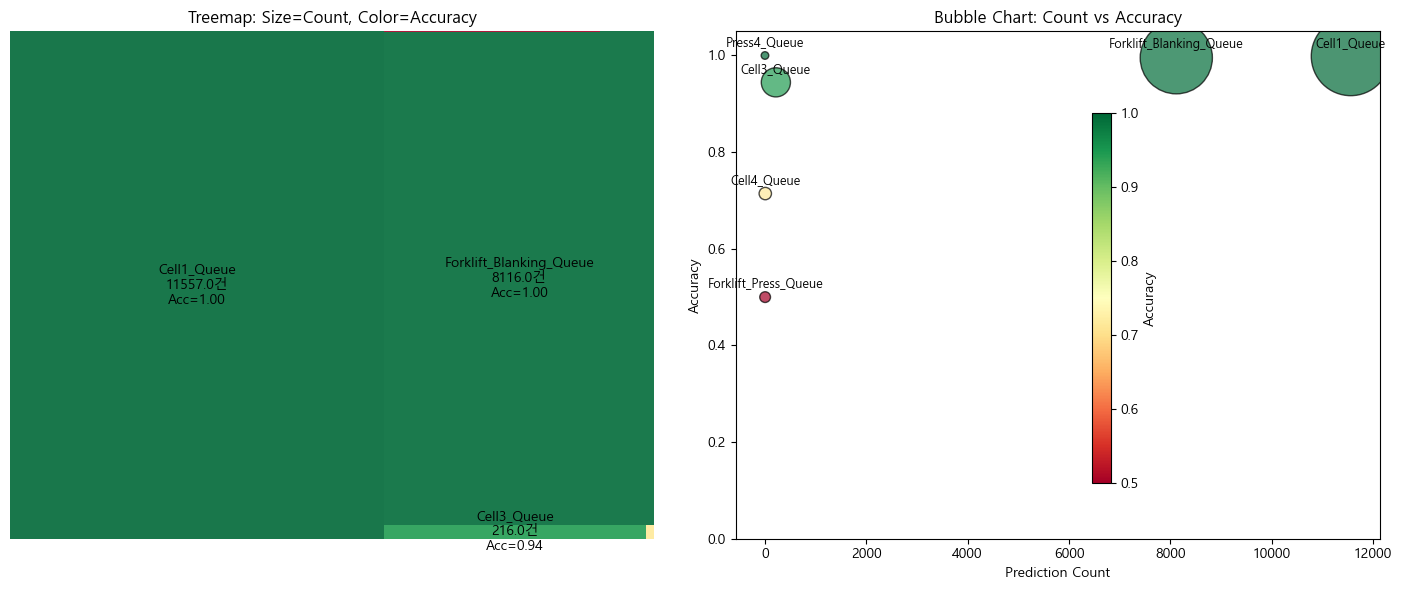

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# ----- CSV 불러오기 -----
df = pd.read_csv("logistic_test_predictions_with_proba.csv")

# ----- 클래스별 Count & Accuracy -----
summary = df.groupby('y_pred', group_keys=False).apply(
    lambda x: pd.Series({
        "Count": len(x),
        "Accuracy": (x['y_true'] == x['y_pred']).mean()
    })
).reset_index()

# ----- 공통 변수 -----
counts = summary['Count'].values
accuracy = summary['Accuracy'].values
classes = summary['y_pred'].values

# ----- 색상 설정 (정확도 기준) -----
norm = mcolors.Normalize(vmin=accuracy.min(), vmax=accuracy.max())
cmap = cm.RdYlGn
colors = [cmap(norm(v)) for v in accuracy]

# ----- Subplot -----
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# === (1) Treemap ===
labels = [
    f"{row['y_pred']}\n{row['Count']}건\nAcc={row['Accuracy']:.2f}"
    if (row['Count']/summary['Count'].sum()*100) > 1 else ""
    for _, row in summary.iterrows()
]

squarify.plot(sizes=counts, label=labels, color=colors, alpha=0.9,
              text_kwargs={'fontsize':10}, ax=axes[0])
axes[0].axis('off')
axes[0].set_title("Treemap: Size=Count, Color=Accuracy")

# === (2) Bubble Chart ===
scatter = axes[1].scatter(summary['Count'], summary['Accuracy'],
                          s=np.sqrt(summary['Count'])*30,
                          c=accuracy, cmap=cmap, alpha=0.7, edgecolors="k")

for i, cls in enumerate(classes):
    axes[1].text(summary['Count'][i], summary['Accuracy'][i]+0.02, cls,
                 fontsize=9, ha='center')

axes[1].set_xlabel("Prediction Count")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Bubble Chart: Count vs Accuracy")
axes[1].set_ylim(0, 1.05)

# ----- Colorbar 공통 추가 -----
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), shrink=0.8)
cbar.set_label("Accuracy")

plt.tight_layout()
plt.show()

C:\Users\KDT6\AppData\Local\Temp\ipykernel_27980\1320060891.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = df.groupby('y_pred', group_keys=False).apply(
C:\Users\KDT6\AppData\Local\Temp\ipykernel_27980\1320060891.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


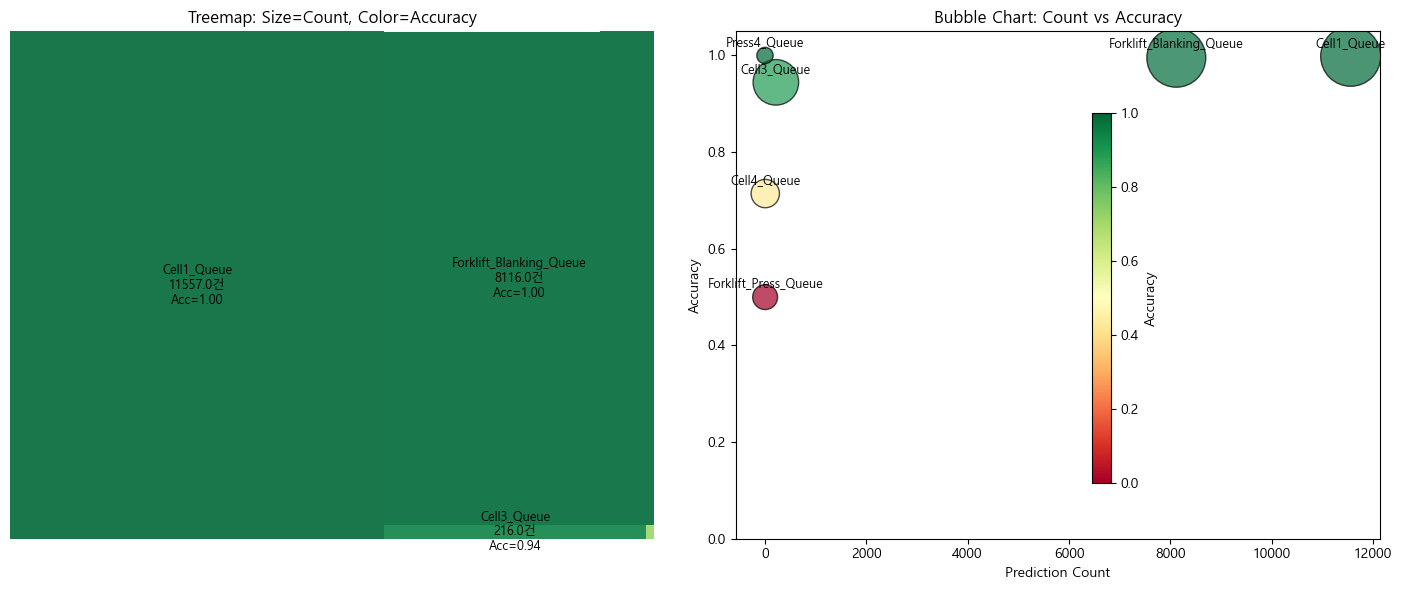

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# ----- CSV 불러오기 -----
df = pd.read_csv("logistic_test_predictions_with_proba.csv")

# ----- 클래스별 Count & Accuracy -----
summary = df.groupby('y_pred', group_keys=False).apply(
    lambda x: pd.Series({
        "Count": len(x),
        "Accuracy": (x['y_true'] == x['y_pred']).mean()
    })
).reset_index()

counts = summary['Count'].values
accuracy = summary['Accuracy'].values
classes = summary['y_pred'].values

# ----- 색상: Accuracy 0~1 고정 -----
norm = mcolors.Normalize(vmin=0, vmax=1)
cmap = cm.RdYlGn
colors = [cmap(norm(v)) for v in accuracy]

# ----- Subplot -----
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# === (1) Treemap ===
labels = [
    f"{row['y_pred']}\n{row['Count']}건\nAcc={row['Accuracy']:.2f}"
    if (row['Count']/summary['Count'].sum()*100) > 1 else ""
    for _, row in summary.iterrows()
]

squarify.plot(sizes=counts, label=labels, color=colors, alpha=0.9,
              text_kwargs={'fontsize':9}, ax=axes[0])
axes[0].axis('off')
axes[0].set_title("Treemap: Size=Count, Color=Accuracy")

# === (2) Bubble Chart ===
bubble_size = np.log1p(summary['Count'])*200
scatter = axes[1].scatter(summary['Count'], summary['Accuracy'],
                          s=bubble_size,
                          c=accuracy, cmap=cmap, alpha=0.7, edgecolors="k")

for i, cls in enumerate(classes):
    axes[1].text(summary['Count'][i], summary['Accuracy'][i]+0.02, cls,
                 fontsize=9, ha='center')

axes[1].set_xlabel("Prediction Count")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Bubble Chart: Count vs Accuracy")
axes[1].set_ylim(0, 1.05)

# ----- Colorbar 공통 -----
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), shrink=0.8)
cbar.set_label("Accuracy")

plt.tight_layout()
plt.show()

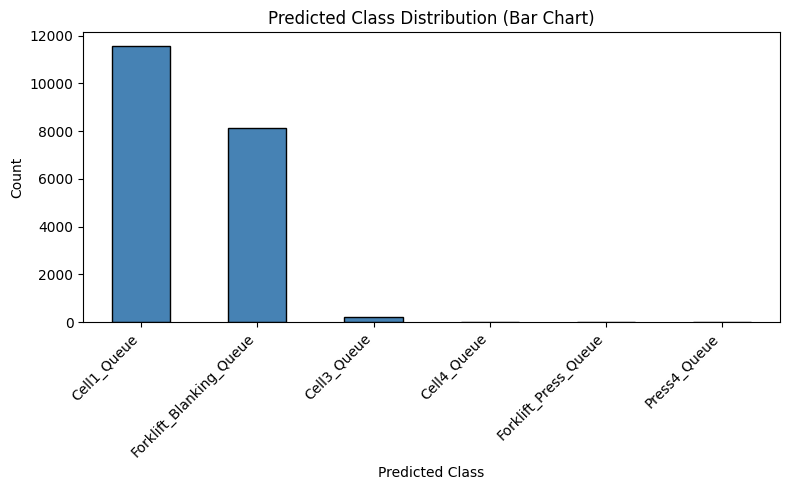

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# ----- CSV 불러오기 -----
df = pd.read_csv("logistic_test_predictions_with_proba.csv")

# ----- 예측 클래스 분포 -----
pred_counts = df['y_pred'].value_counts()

# ----- 막대그래프 -----
plt.figure(figsize=(8,5))
pred_counts.plot(
    kind='bar',
    color='steelblue',
    edgecolor='black'
)
plt.title("Predicted Class Distribution (Bar Chart)")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

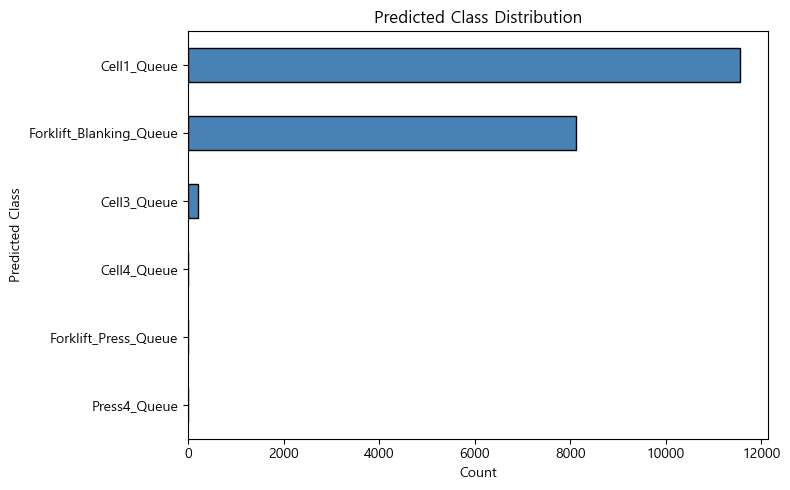

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("logistic_test_predictions_with_proba.csv")
pred_counts = df['y_pred'].value_counts()

plt.figure(figsize=(8,5))
pred_counts.sort_values().plot(
    kind='barh',
    color='steelblue',
    edgecolor='black'
)
plt.title("Predicted Class Distribution")
plt.xlabel("Count")
plt.ylabel("Predicted Class")
plt.tight_layout()
plt.show()

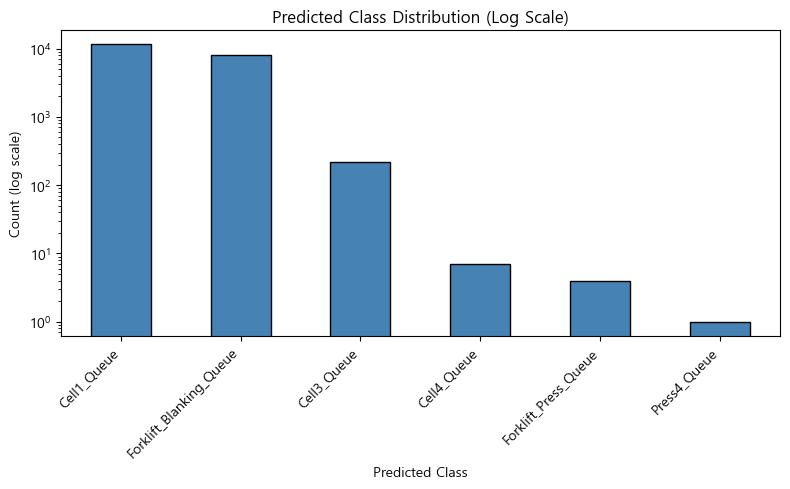

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("logistic_test_predictions_with_proba.csv")
pred_counts = df['y_pred'].value_counts()

plt.figure(figsize=(8,5))
pred_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.yscale('log')
plt.title("Predicted Class Distribution (Log Scale)")
plt.xlabel("Predicted Class")
plt.ylabel("Count (log scale)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

C:\Users\KDT6\AppData\Local\Temp\ipykernel_27980\290760387.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = df.groupby(['y_pred']).apply(


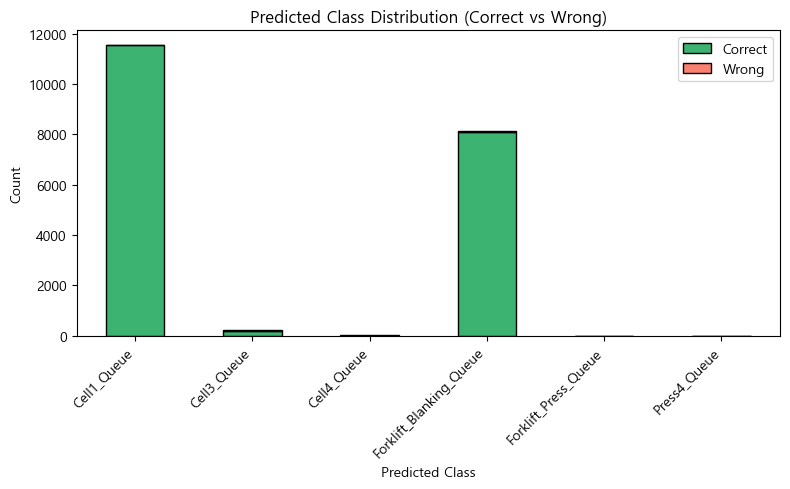

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("logistic_test_predictions_with_proba.csv")

summary = df.groupby(['y_pred']).apply(
    lambda x: pd.Series({
        "Correct": (x['y_true']==x['y_pred']).sum(),
        "Wrong":   (x['y_true']!=x['y_pred']).sum()
    })
)

summary[['Correct','Wrong']].plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    color=['mediumseagreen','salmon'],
    edgecolor='black'
)

plt.title("Predicted Class Distribution (Correct vs Wrong)")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [28]:
# import pandas as pd
# import matplotlib.pyplot as plt

# df = pd.read_csv("logistic_test_predictions_with_proba.csv")
# pred_counts = df['y_pred'].value_counts()

# plt.figure(figsize=(8,5))
# (pred_counts / pred_counts.sum() * 100).plot(
#     kind='bar',
#     color='steelblue',
#     edgecolor='black'
# )
# plt.title("Predicted Class Distribution (%)")
# plt.xlabel("Predicted Class")
# plt.ylabel("Percentage (%)")
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()

C:\Users\KDT6\AppData\Local\Temp\ipykernel_27980\3911076666.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = df.groupby('y_pred').apply(
C:\Users\KDT6\AppData\Local\Temp\ipykernel_27980\3911076666.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(summary['y_pred'], rotation=45, ha="right")


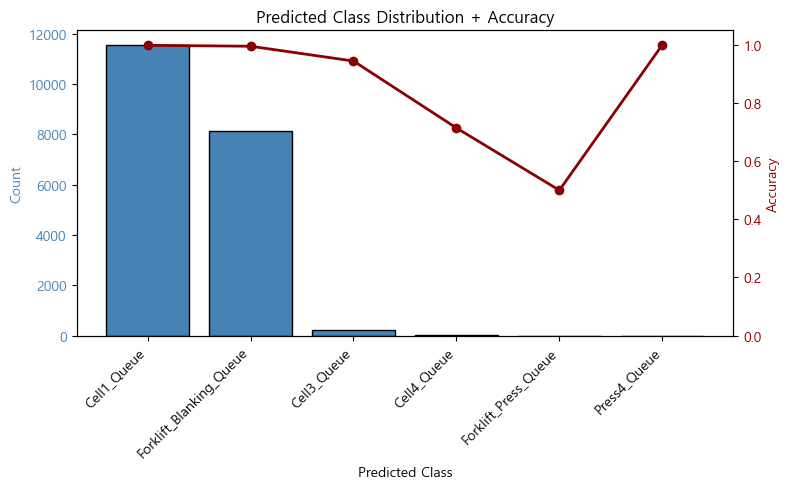

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 불러오기
df = pd.read_csv("logistic_test_predictions_with_proba.csv")

# 클래스별 Count & Accuracy 계산
summary = df.groupby('y_pred').apply(
    lambda x: pd.Series({
        "Count": len(x),
        "Accuracy": (x['y_true'] == x['y_pred']).mean()
    })
).reset_index()

# Count 내림차순으로 정렬 (막대+선 순서 통일)
summary = summary.sort_values("Count", ascending=False)

# Plot
fig, ax1 = plt.subplots(figsize=(8,5))

# 막대: Count
ax1.bar(summary['y_pred'], summary['Count'], color="steelblue", edgecolor="black")
ax1.set_xlabel("Predicted Class")
ax1.set_ylabel("Count", color="steelblue")
ax1.tick_params(axis="y", labelcolor="steelblue")
ax1.set_xticklabels(summary['y_pred'], rotation=45, ha="right")

# 선: Accuracy
ax2 = ax1.twinx()
ax2.plot(summary['y_pred'], summary['Accuracy'], 
         color="darkred", marker="o", linewidth=2, label="Accuracy")
ax2.set_ylabel("Accuracy", color="darkred")
ax2.tick_params(axis="y", labelcolor="darkred")
ax2.set_ylim(0, 1.05)

plt.title("Predicted Class Distribution + Accuracy")
fig.tight_layout()
plt.show()

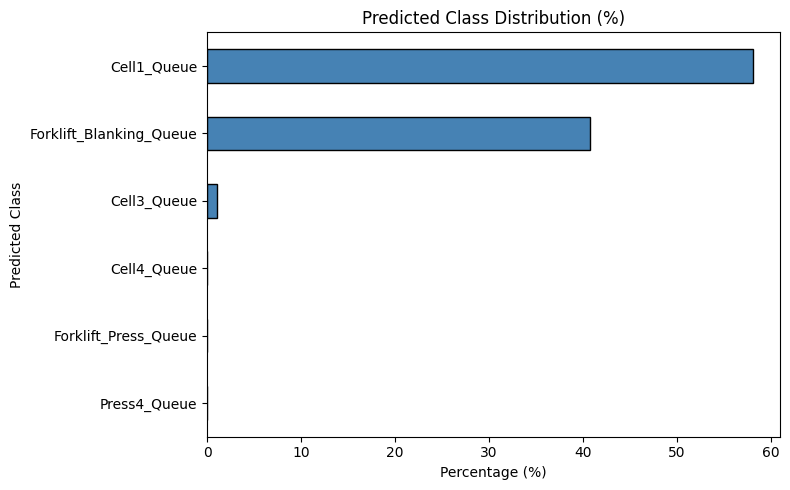

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("logistic_test_predictions_with_proba.csv")

pred_counts = df['y_pred'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,5))
pred_counts.sort_values().plot(kind='barh', color='steelblue', edgecolor='black')
plt.title("Predicted Class Distribution (%)")
plt.xlabel("Percentage (%)")
plt.ylabel("Predicted Class")
plt.tight_layout()
plt.show()

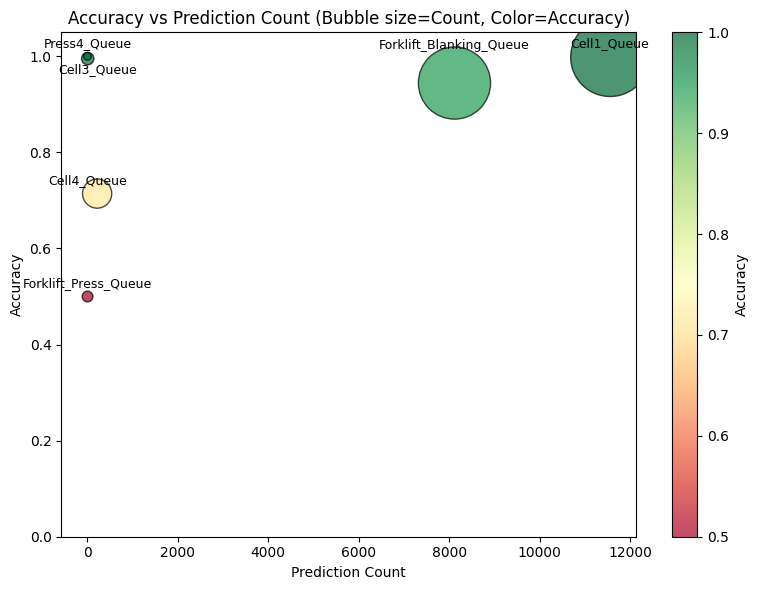

In [17]:
import numpy as np

plt.figure(figsize=(8,6))
scatter = plt.scatter(pred_counts, class_accuracy, 
                      s=np.sqrt(pred_counts)*30, 
                      c=class_accuracy, cmap="RdYlGn", alpha=0.7, edgecolors="k")

for cls in pred_counts.index:
    plt.text(pred_counts[cls], class_accuracy[cls]+0.02, cls, fontsize=9, ha='center')

plt.xlabel("Prediction Count")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Prediction Count (Bubble size=Count, Color=Accuracy)")
plt.ylim(0, 1.05)
plt.colorbar(scatter, label="Accuracy")
plt.tight_layout()
plt.show()

In [18]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (윈도우: 맑은 고딕 / 맥: 애플고딕 / 리눅스: 나눔고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 AppleGothic, NanumGothic
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

C:\Users\KDT6\AppData\Local\Temp\ipykernel_27980\3310268773.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = df.groupby('y_pred', group_keys=False).apply(


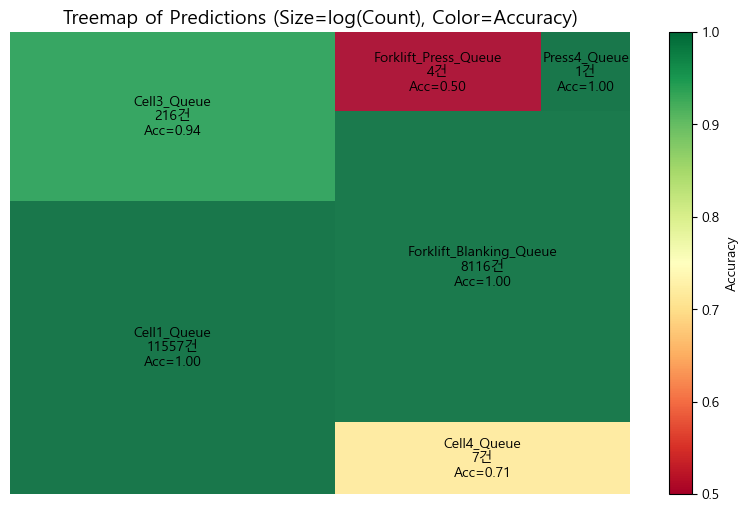

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import numpy as np
from matplotlib import colors

# ----- 데이터 요약 -----
summary = df.groupby('y_pred', group_keys=False).apply(
    lambda x: pd.Series({
        "Count": len(x),
        "Accuracy": (x['y_true'] == x['y_pred']).mean()
    })
).reset_index()

# ----- 크기 로그 스케일 -----
sizes = np.log1p(summary['Count'])

# ----- 정확도 값 0~1 사이로 정규화 -----
norm = colors.Normalize(vmin=summary['Accuracy'].min(), vmax=summary['Accuracy'].max())
cmap = plt.cm.RdYlGn  # 빨강-노랑-초록 팔레트
color_vals = cmap(norm(summary['Accuracy']))

# ----- 라벨 -----
labels = [
    f"{row['y_pred']}\n{int(row['Count'])}건\nAcc={row['Accuracy']:.2f}"
    for _, row in summary.iterrows()
]

# ----- Treemap -----
fig, ax = plt.subplots(figsize=(10,6))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=color_vals,
    alpha=0.9,
    text_kwargs={'fontsize':10},
    ax=ax
)
ax.axis('off')
ax.set_title("Treemap of Predictions (Size=log(Count), Color=Accuracy)", fontsize=14)

# ----- Colorbar 추가 -----
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax)  # ax 명시
cbar.set_label('Accuracy')

plt.show()